<a href="https://colab.research.google.com/github/harinadhkreddy/BadBuyPredictionAO/blob/main/bad_buy_f_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

<h2>Data Dictionary/features</h2>

|Field Name		|	  	Definition|
|----------|--------------|
|RefID	|		        Unique (sequential) number assigned to vehicles|
IsBadBuy	|			Identifies if the kicked vehicle was an avoidable purchase 
PurchDate	|			The Date the vehicle was Purchased at Auction
Auction		|			Auction provider at which the  vehicle was purchased
VehYear		|			The manufacturer's year of the vehicle
VehicleAge|				The Years elapsed since the manufacturer's year
Make			|		Vehicle Manufacturer 
Model			|		Vehicle Model
Trim			|		Vehicle Trim Level
SubModel	|			Vehicle Submodel
Color			|		Vehicle Color
Transmission|				Vehicles transmission type (Automatic, Manual)
WheelTypeID	|			The type id of the vehicle wheel
WheelType		|		The vehicle wheel type description (Alloy, Covers)
VehOdo			|		The vehicles odometer reading
Nationality	|			The Manufacturer's country
Size			|		The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName |			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice |	Acquisition price for this vehicle in average condition at time of purchase	
MMRAcquisitionAuctionCleanPrice	|	Acquisition price for this vehicle in the above Average condition at time of purchase
MMRAcquisitionRetailAveragePrice |	Acquisition price for this vehicle in the retail market in average condition at time of purchase
MMRAcquisitonRetailCleanPrice	|	Acquisition price for this vehicle in the retail market in above average condition at time of purchase
MMRCurrentAuctionAveragePrice	|	Acquisition price for this vehicle in average condition as of current day	
MMRCurrentAuctionCleanPrice	|	Acquisition price for this vehicle in the above condition as of current day
MMRCurrentRetailAveragePrice	|	Acquisition price for this vehicle in the retail market in average condition as of current day
MMRCurrentRetailCleanPrice	|	Acquisition price for this vehicle in the retail market in above average condition as of current day
PRIMEUNIT		|		Identifies if the vehicle would have a higher demand than a standard purchase
AcquisitionType	|			Identifies how the vehicle was aquired (Auction buy, trade in, etc)
AUCGUART	|			The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
KickDate		|		Date the vehicle was kicked back to the auction
BYRNO		|			Unique number assigned to the buyer that purchased the vehicle
VNZIP     |                              Zipcode where the car was purchased
VNST    |                                State where the the car was purchased
VehBCost	|			Acquisition cost paid for the vehicle at time of purchase
IsOnlineSale		|		Identifies if the vehicle was originally purchased online
WarrantyCost     |                       Warranty price (term=36month  and millage=36K) 



In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv("/content/drive/My Drive/data/badbuyprediction/training.csv")
print(df_train.shape)
df_test = pd.read_csv("/content/drive/My Drive/data/badbuyprediction/test.csv")
print(df_test.shape)

(72983, 34)
(48707, 33)


<h2>Exploratory Data Analysis</h2>

In [4]:
df_train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [5]:
df_test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


VNZIP1,isonlinesale is categorial , wheeltypeid is repetitive of wheeltype

In [8]:
df_train.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


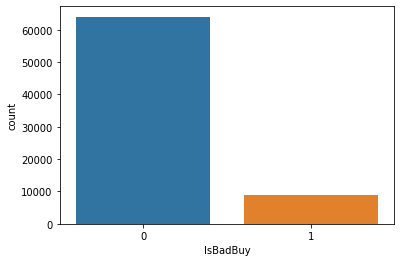

In [10]:
sns.countplot(df_train['IsBadBuy'])
plt.show()

<h6>Observation</h6>
Imbalanced binary classification, upsample the miniority class

In [11]:
numcol = df_train.select_dtypes('number').columns.tolist()
catcol = df_train.select_dtypes('object').columns.tolist()
print(numcol,"\n", catcol)

['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'] 
 ['PurchDate', 'Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']


In [12]:
numcol = list(set(numcol) - {'IsBadBuy','IsOnlineSale','VNZIP1',})
catcol = list(set(catcol).union({'IsOnlineSale','VNZIP1'}))
print(numcol,"\n", catcol)

['WheelTypeID', 'MMRAcquisitionAuctionCleanPrice', 'RefId', 'VehicleAge', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 'VehYear', 'VehBCost', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'VehOdo', 'MMRAcquisitionRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'WarrantyCost', 'BYRNO'] 
 ['SubModel', 'Trim', 'Color', 'IsOnlineSale', 'Model', 'Nationality', 'VNST', 'VNZIP1', 'Make', 'Auction', 'PurchDate', 'TopThreeAmericanName', 'AUCGUART', 'Transmission', 'Size', 'WheelType', 'PRIMEUNIT']


<h4>Categorical features</h4>

countplots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


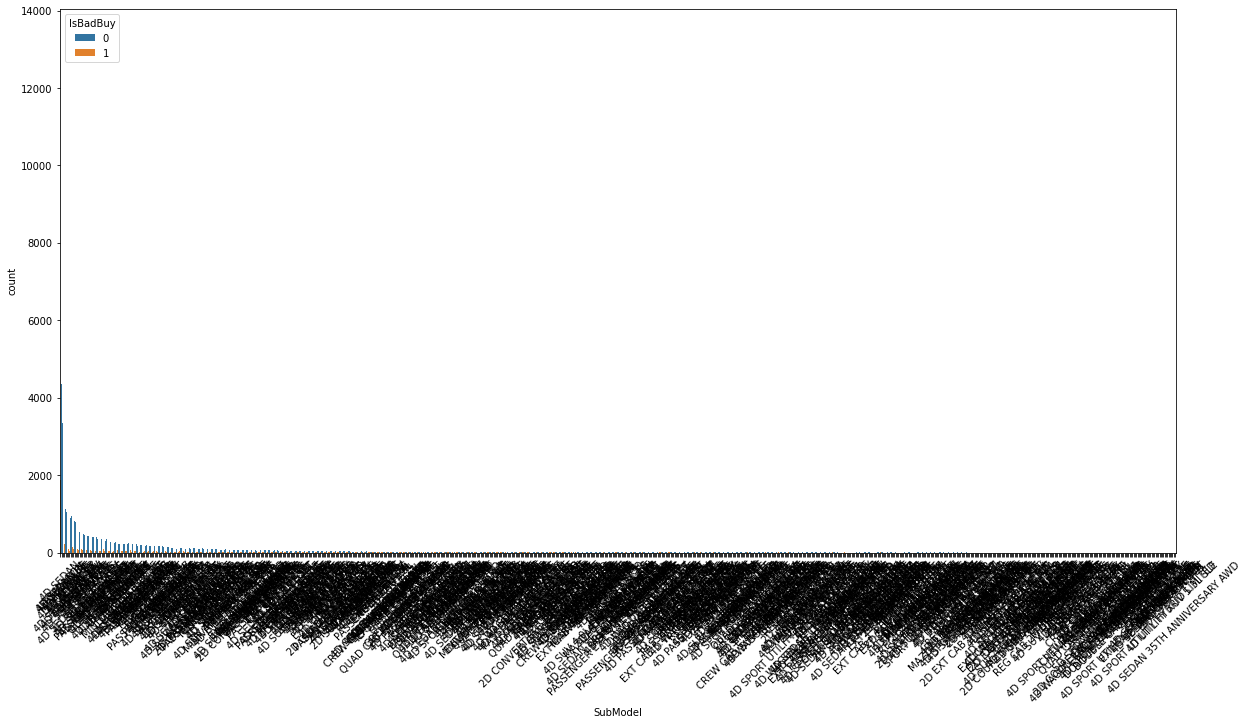

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


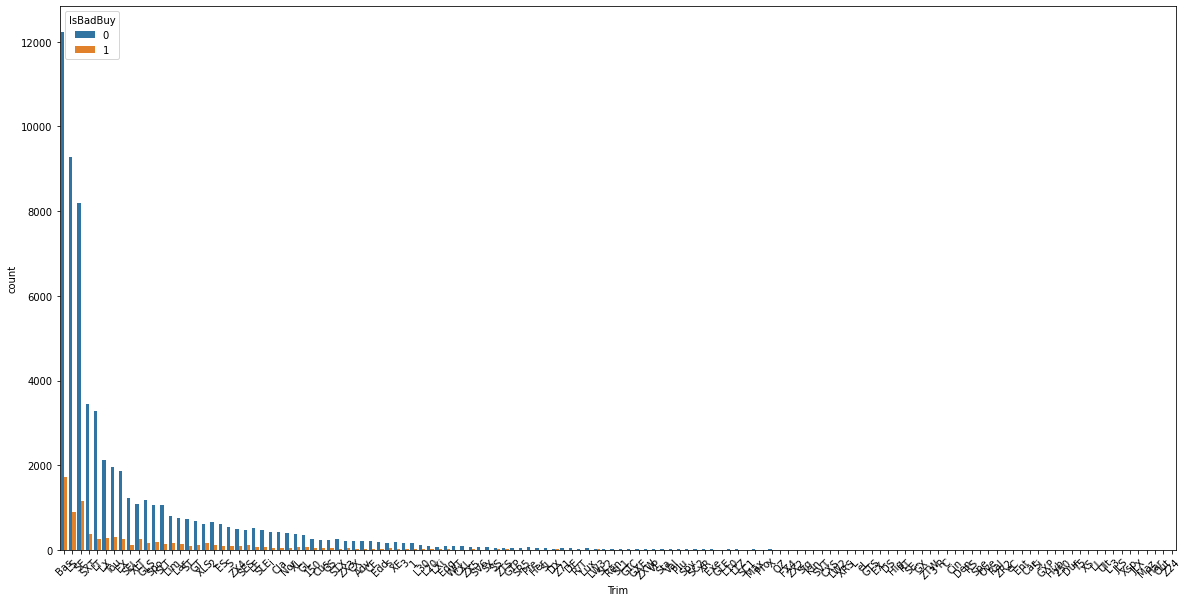

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


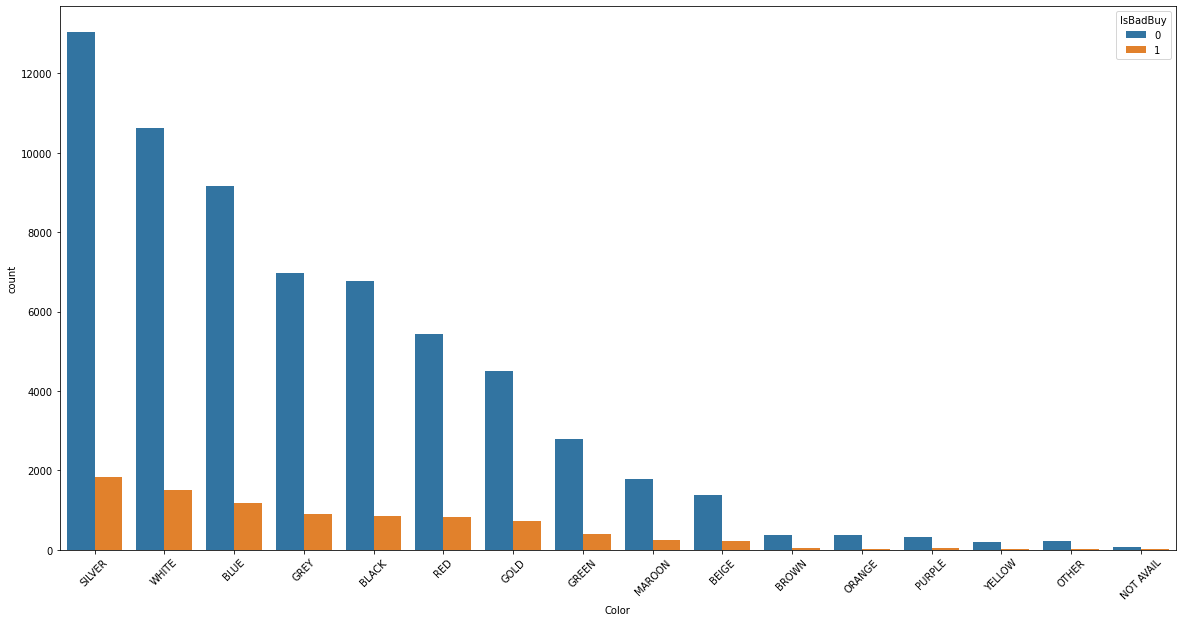

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


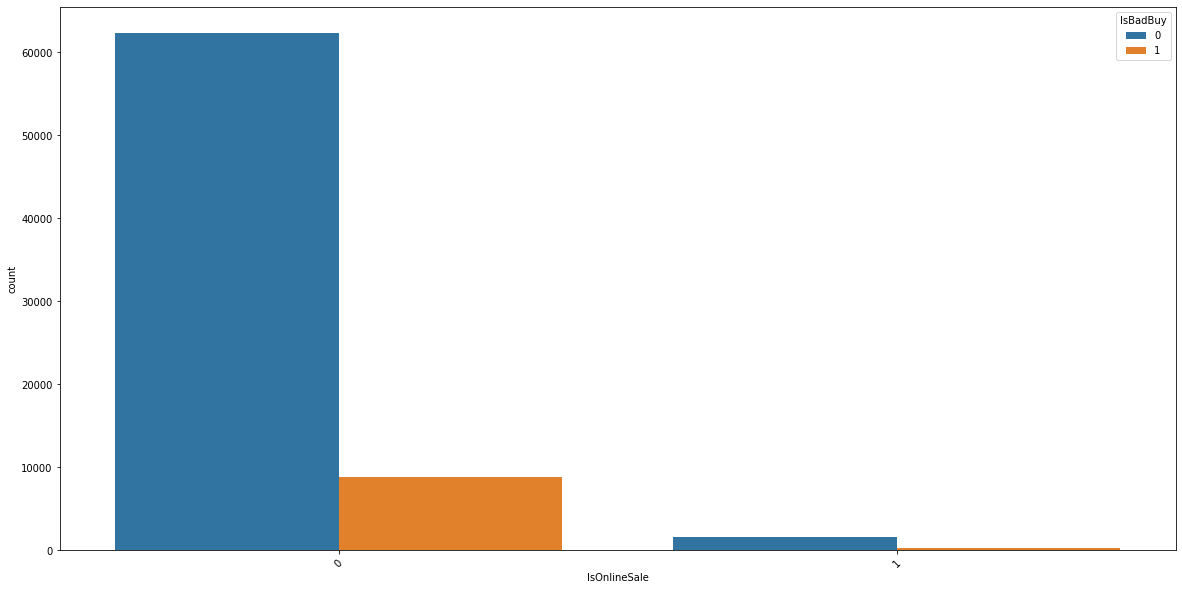

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


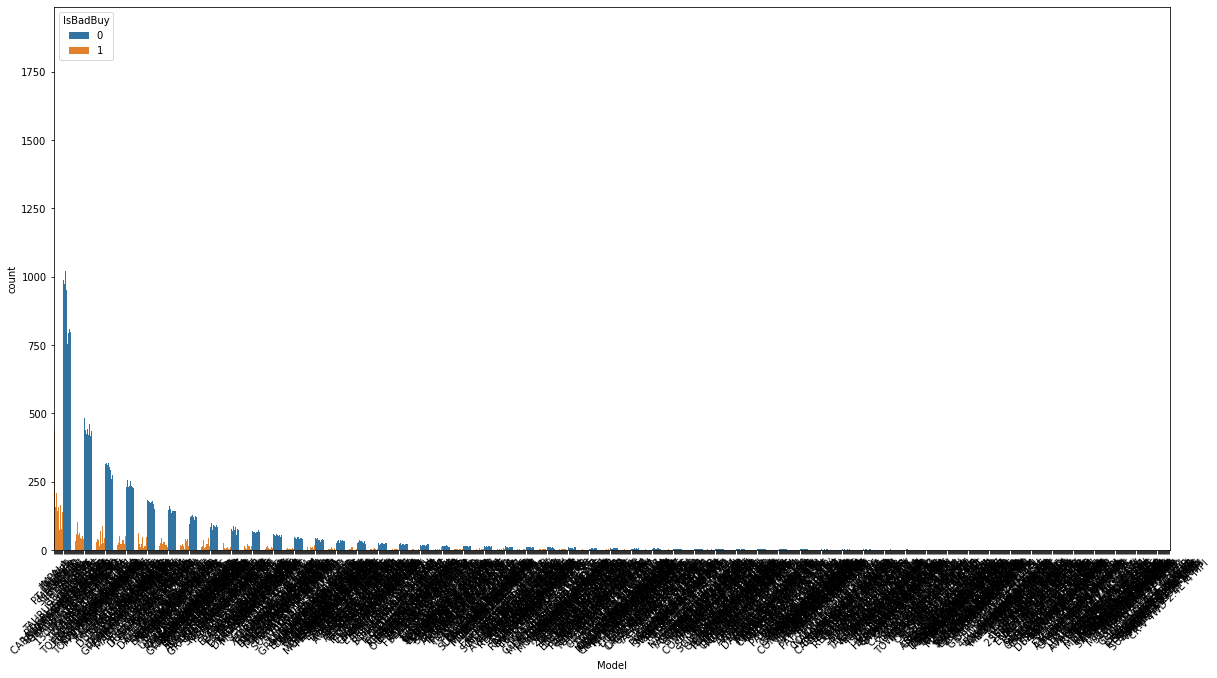

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


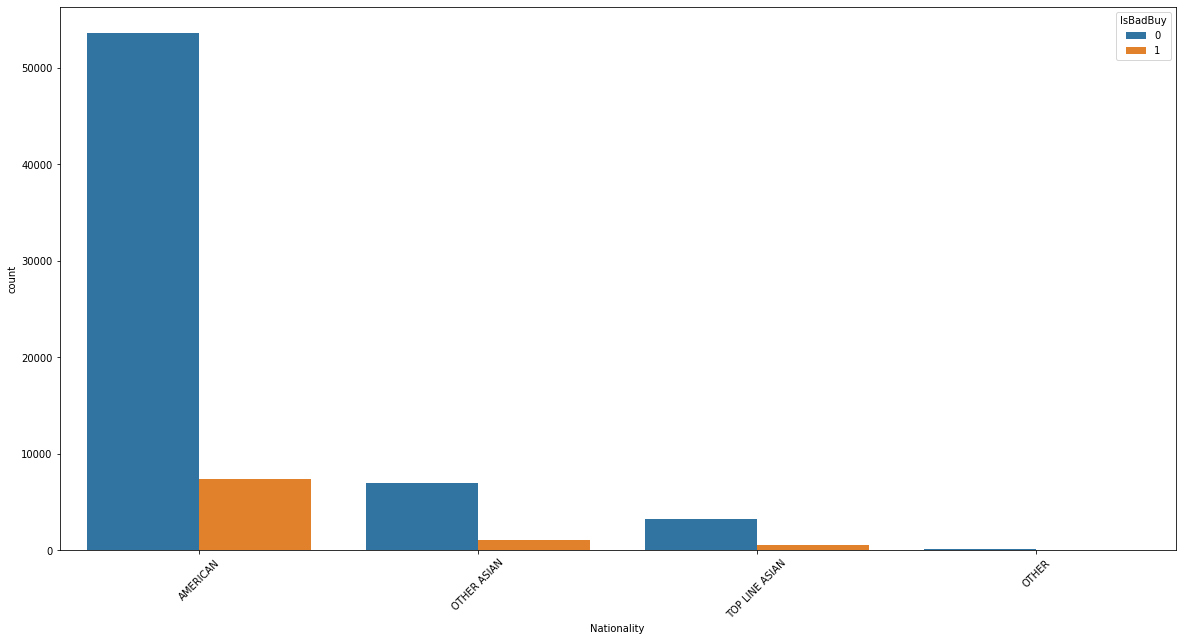

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


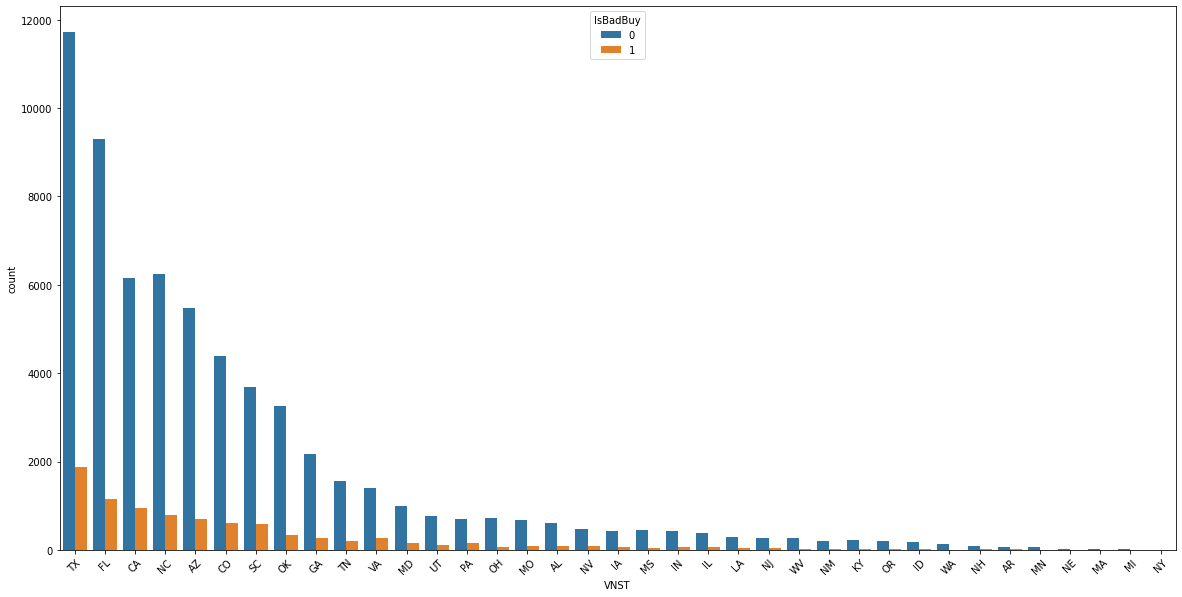

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


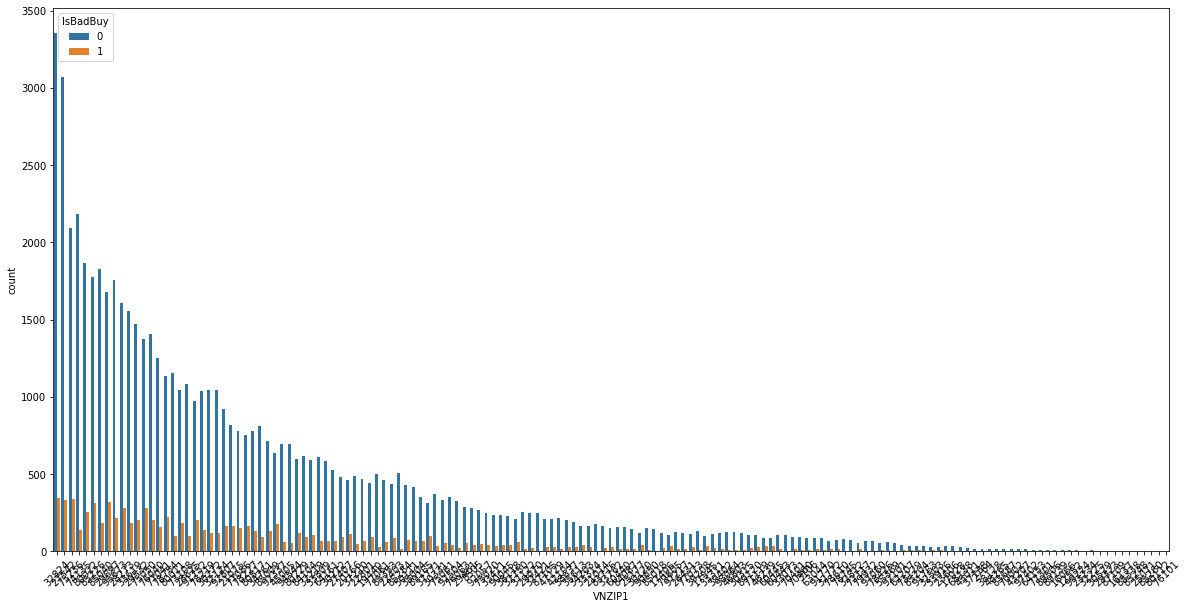

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


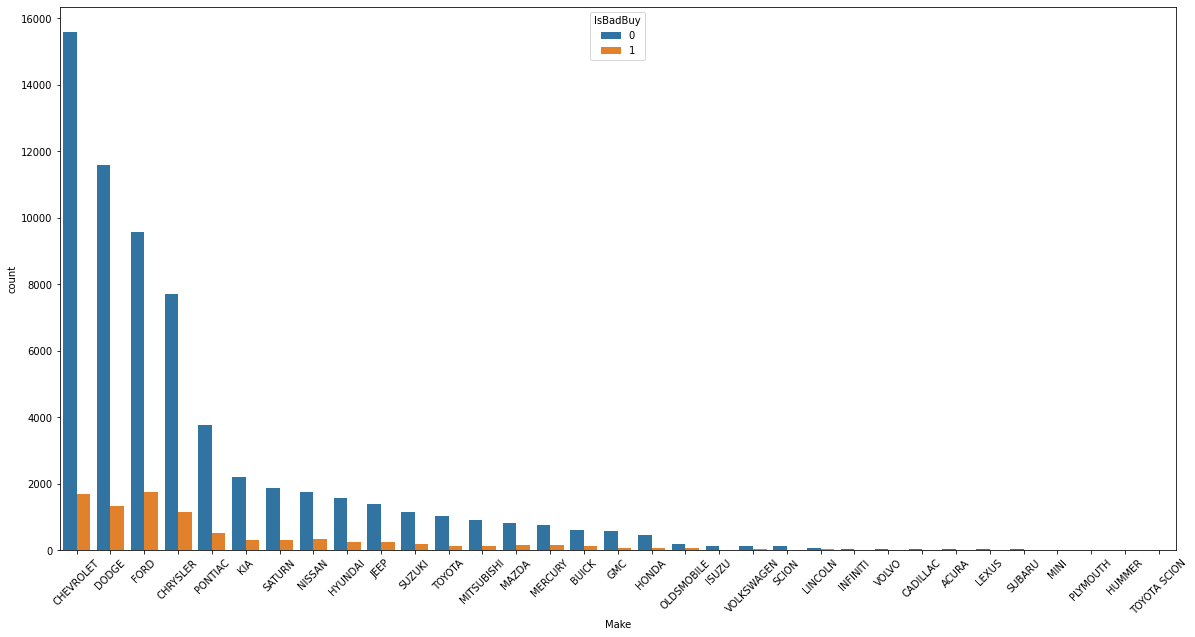

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


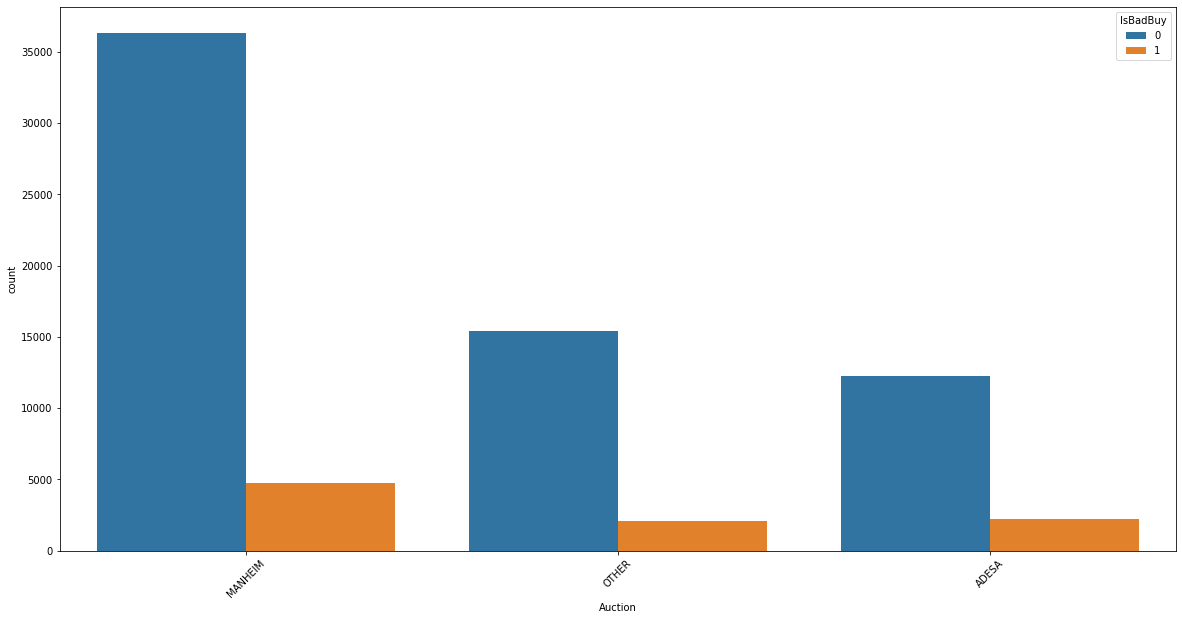

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


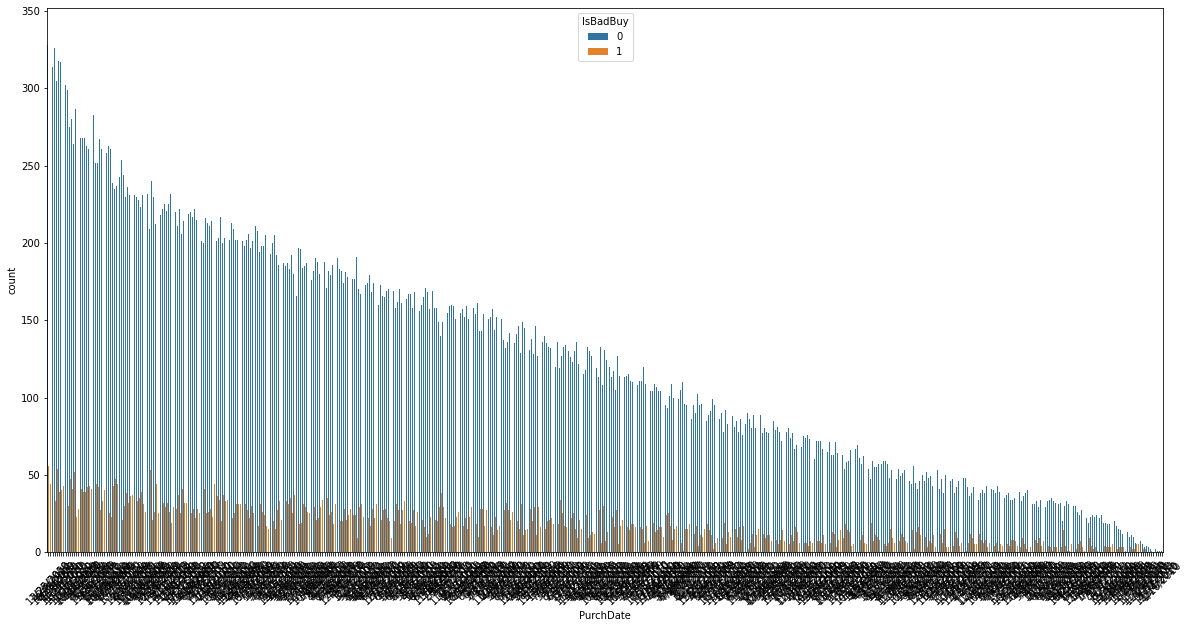

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


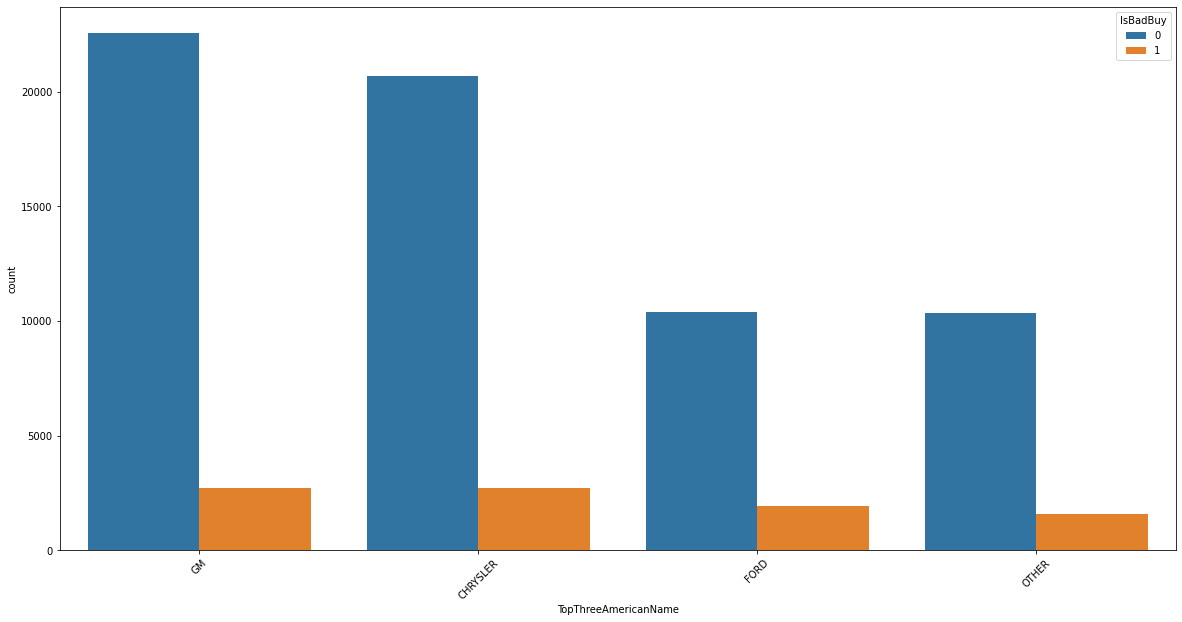

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


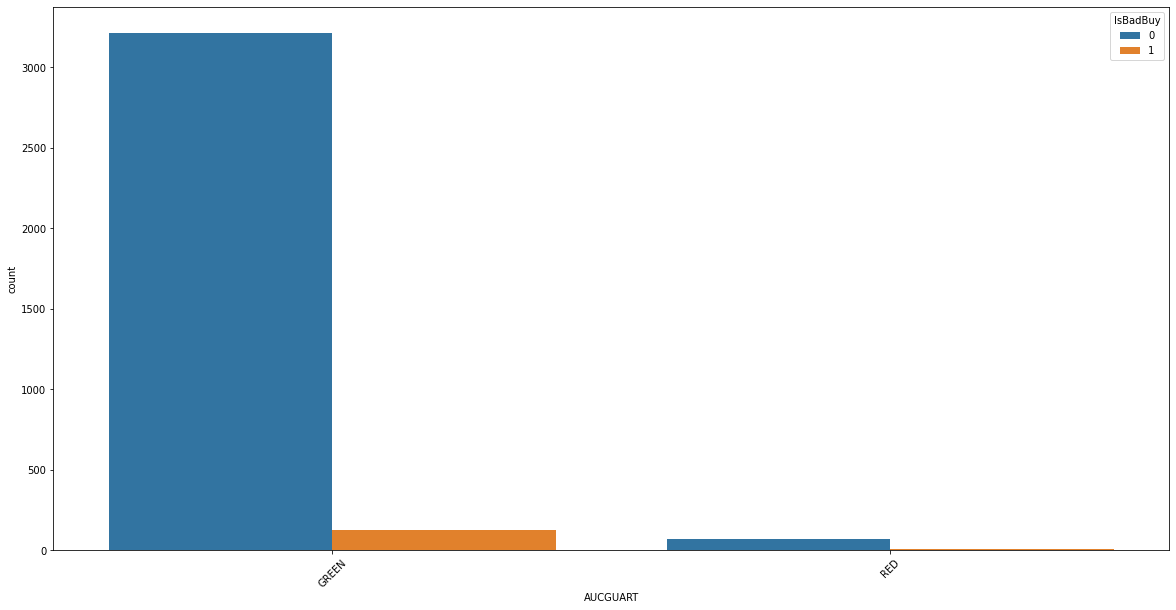

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


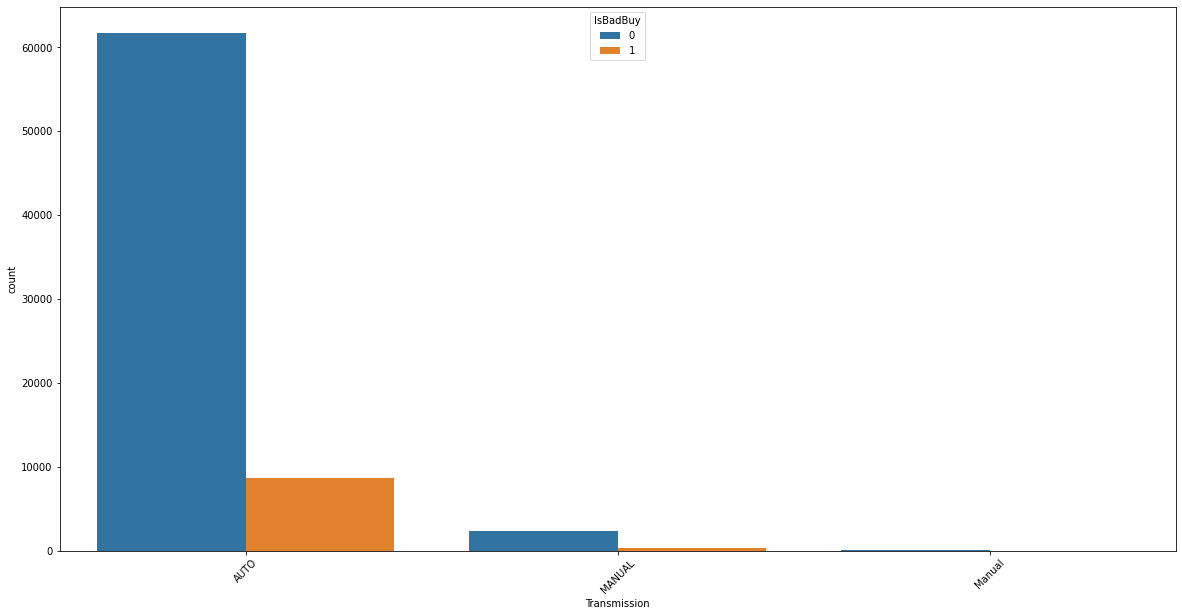

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


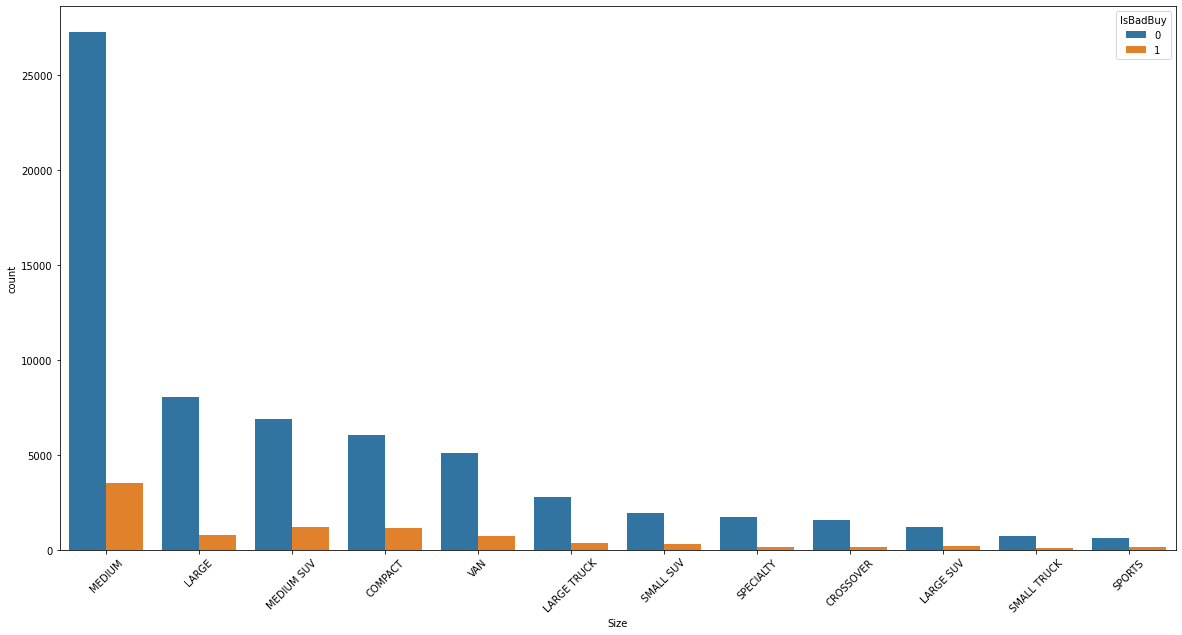

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


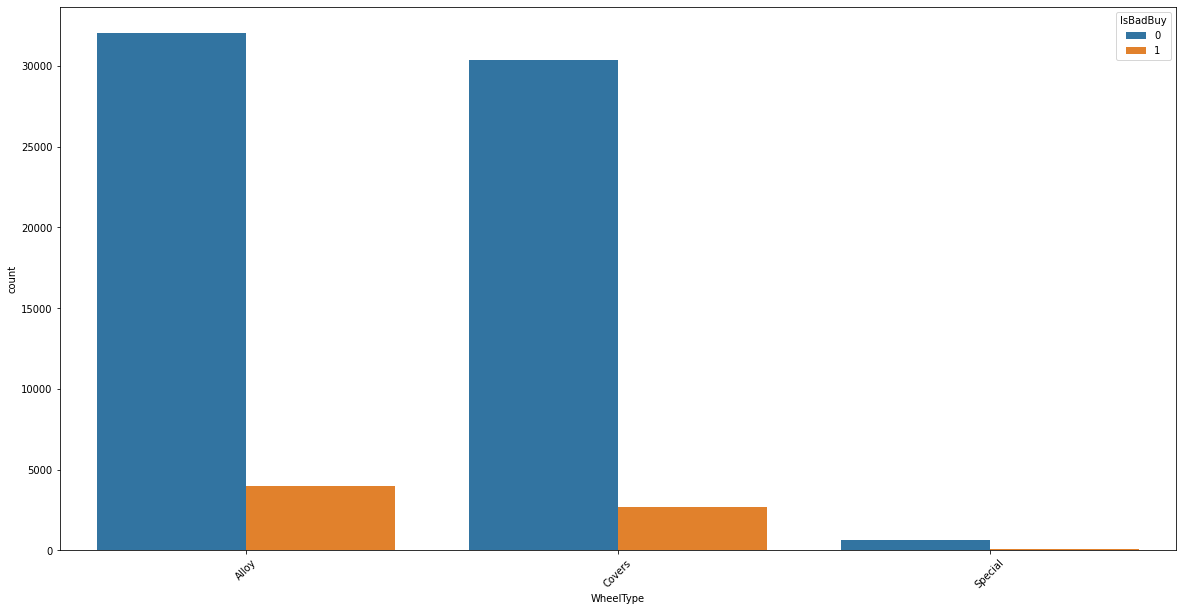

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


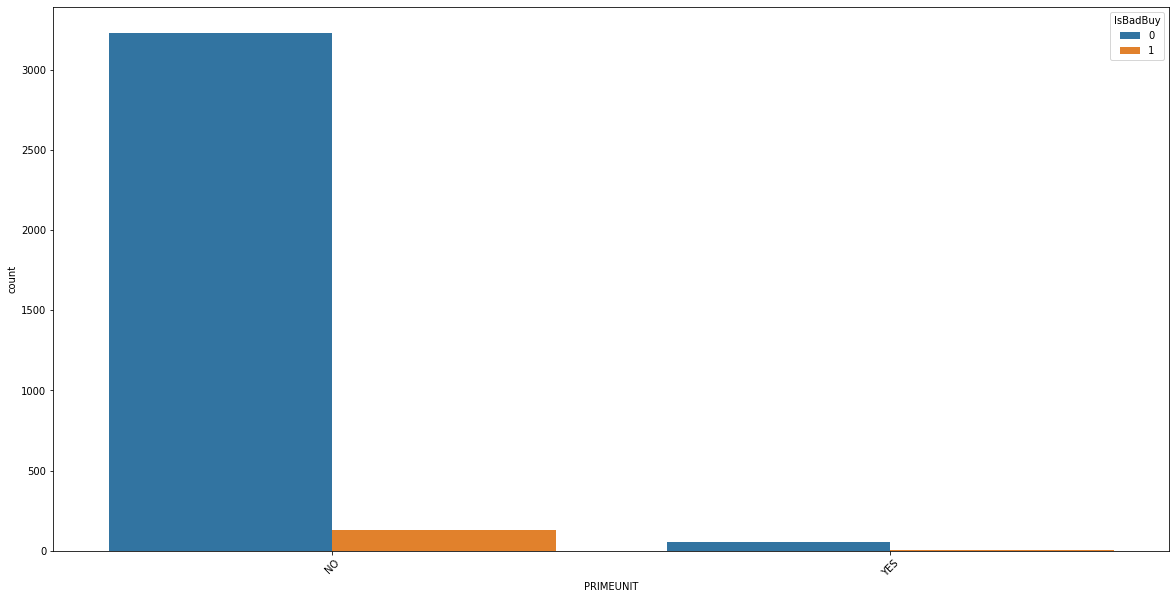

In [13]:
for e in catcol:
  plt.figure(figsize=(20,10))
  sns.countplot(df_train[e], order= df_train[e].value_counts().index, hue=df_train['IsBadBuy'])
  plt.xticks(rotation=45)
  plt.show()

categorical feature observations:

* color : silver, white are most sold follow by blue , grey ,black,red.. etc
* auction : manheim is most occuring auction provider
* primeunit : most vechiles have doesnt have higher demand than standard price (caution: most of the data is missing in this feature)
* aucguart : data missing in this feature but for remaining data green(auction has given guaranteed/arbitratable) is occuring more
* purchase date : convert to numerical feature using time series
*make: chervolet, dodge, ford , chrysler ,pontiac are most sold
* VNST : texas and florida has highest buyers
* topthreeamerican : gm(chervolet parent company),chrysler have more sales than ford and others
* transmission : auto has more sales (error check: MANUAL and Manual)
* Nationality : American dominates this auction sales, other asian has more sales than top line asian
* VNZIP1 : Further analysis required as it has more categories
* WheelType : alloy and wheel covers has almost equal sales(WheelTypeId is same as this drop this feature)
* IsSaleOnline : Most of the sales are offline
* Trim : further analysis required
* Size : mostly of auction buyers are interested in medium size vechicles
* submodel : further analysis required
* model : further analysis required

<h4>Numerical Features</h4>
boxplot

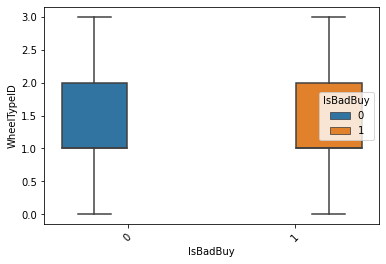

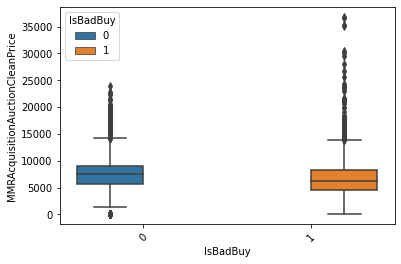

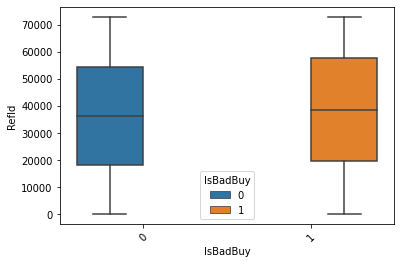

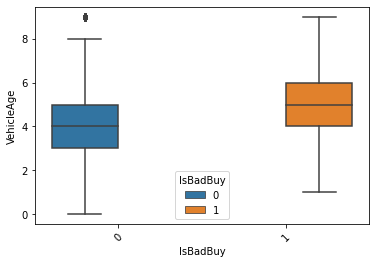

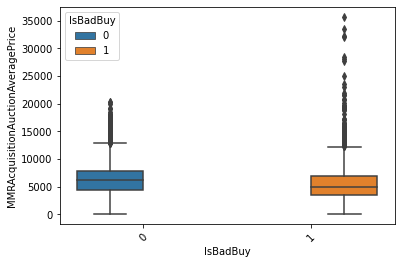

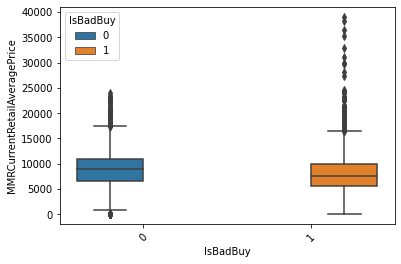

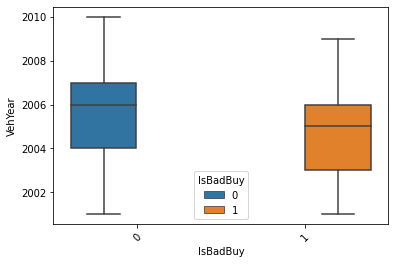

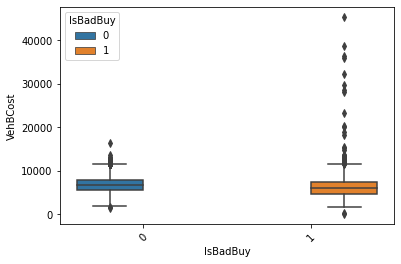

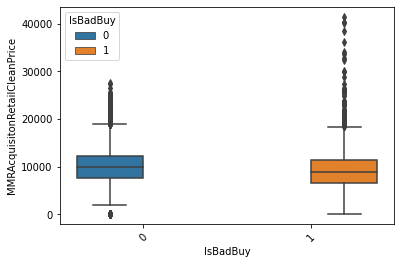

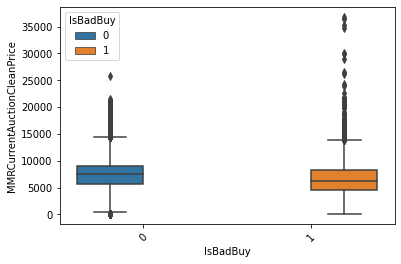

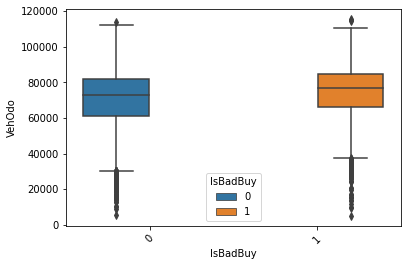

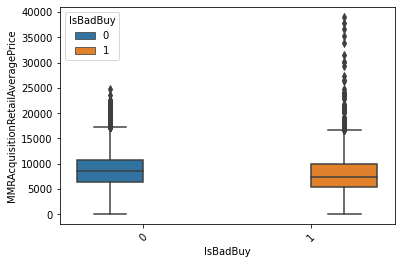

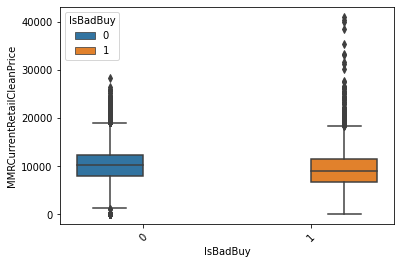

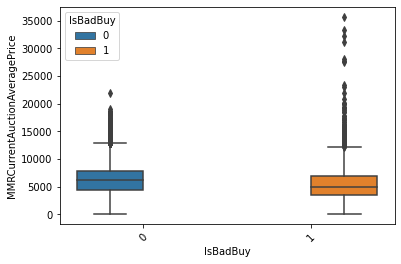

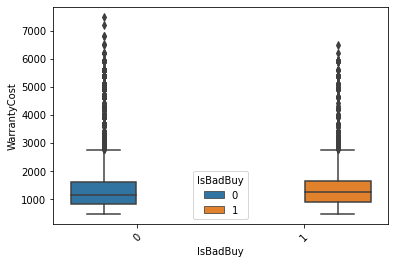

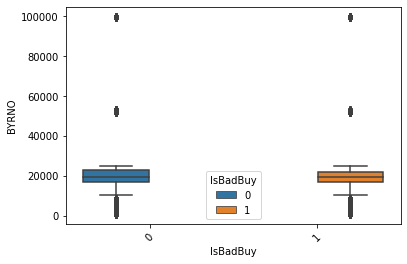

In [14]:
for e in numcol:
  plt.figure()
  sns.boxplot(data=df_train,y=e,x='IsBadBuy', hue= 'IsBadBuy')
  plt.xticks(rotation=45)
  plt.show()

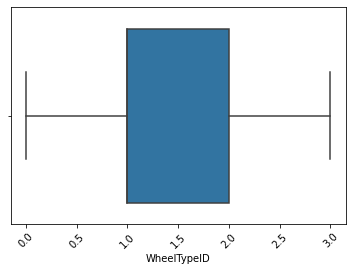

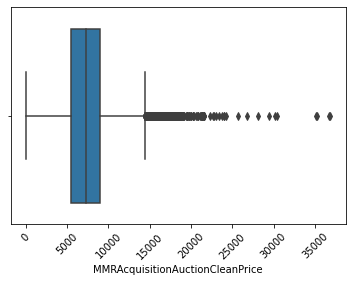

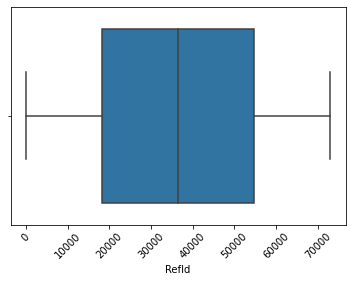

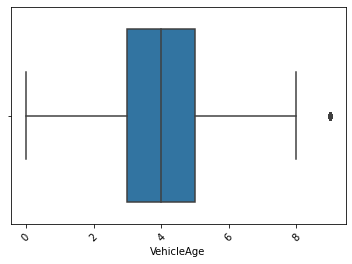

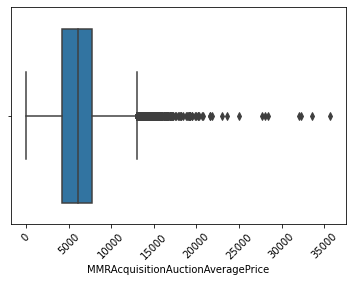

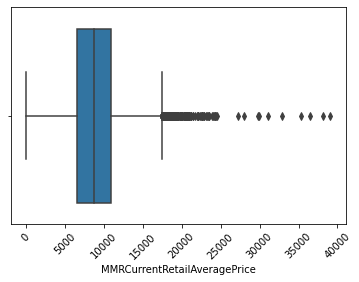

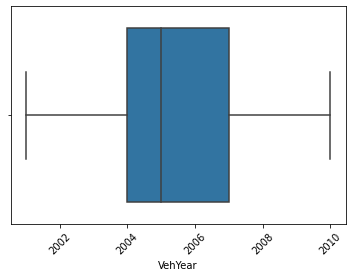

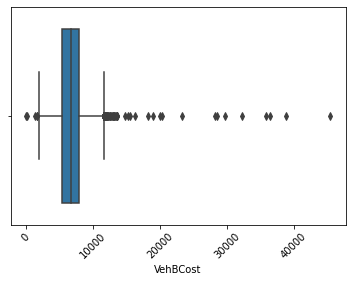

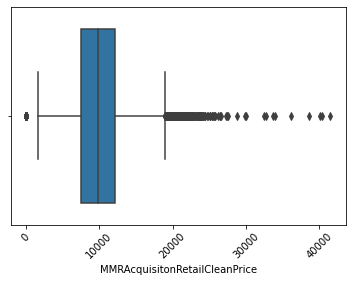

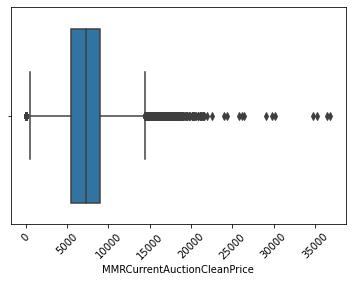

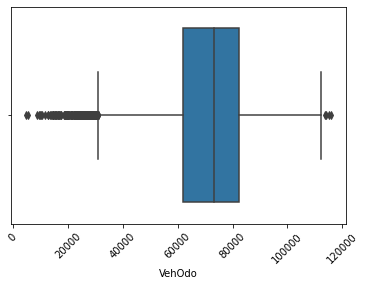

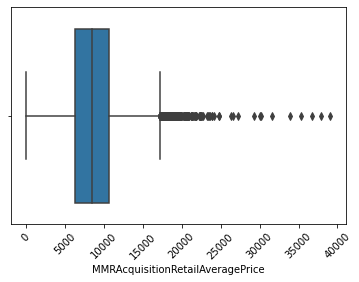

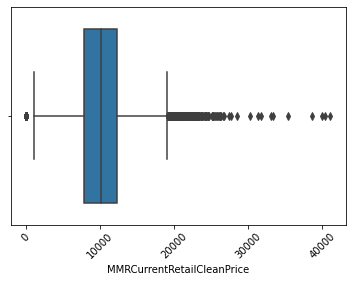

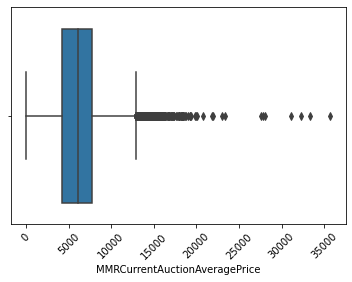

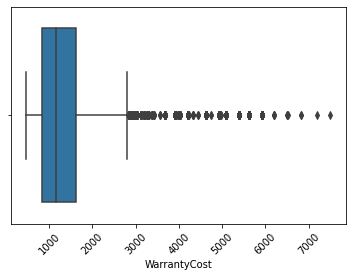

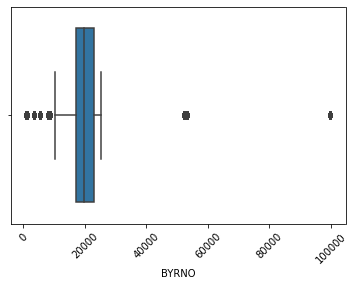

In [15]:
for e in numcol:
  plt.figure()
  sns.boxplot(data=df_train,x=e)
  plt.xticks(rotation=45)
  plt.show()

Observations:

* vehicle age and veh year even though there is overlap for isbadbuy older vehicles are prone to be bad buy. 

<h6>Date handling</h6>

from date creating 2 new features 'PurMonth' for month of purchase and 'Purday' for day of week of purchase

In [16]:
df_train['PurMonth']=pd.to_datetime(df_train['PurchDate'], dayfirst=True).dt.month
df_test['PurMonth']=pd.to_datetime(df_test['PurchDate'], dayfirst=True).dt.month
df_train['Purday']=pd.to_datetime(df_train['PurchDate'], dayfirst=True).dt.day_name()
df_test['Purday']=pd.to_datetime(df_test['PurchDate'], dayfirst=True).dt.day_name()

In [17]:
print(df_train['PurMonth'].value_counts())
print(df_test['PurMonth'].value_counts())

10    7468
9     6862
4     6413
7     6313
8     6131
11    6083
2     5957
1     5931
3     5918
5     5506
6     5450
12    4951
Name: PurMonth, dtype: int64
10    5180
9     5074
8     4120
4     4063
2     4017
5     3959
11    3837
1     3835
7     3822
3     3822
6     3765
12    3213
Name: PurMonth, dtype: int64


In [18]:
print(df_train['Purday'].value_counts())
print(df_test['Purday'].value_counts())

Wednesday    18884
Tuesday      16279
Thursday     13380
Monday        9079
Friday        8455
Saturday      3881
Sunday        3025
Name: Purday, dtype: int64
Wednesday    11954
Tuesday      11006
Thursday     10432
Friday        5655
Monday        4765
Saturday      2848
Sunday        2047
Name: Purday, dtype: int64


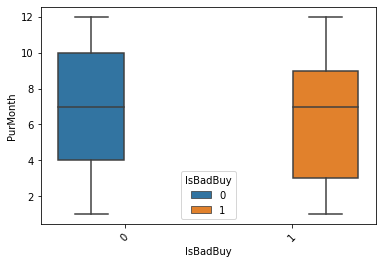

In [19]:
plt.figure()
sns.boxplot(data=df_train,y='PurMonth',x='IsBadBuy', hue= 'IsBadBuy')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


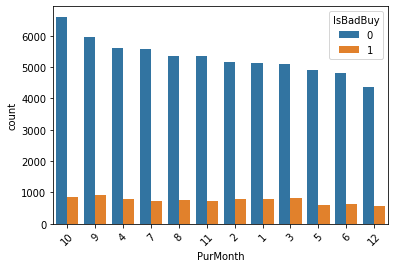

In [20]:
plt.figure()
sns.countplot(df_train['PurMonth'], order= df_train['PurMonth'].value_counts().index, hue=df_train['IsBadBuy'])
plt.xticks(rotation=45)
plt.show()

july ,august, sep, october has many purchases <br>
April has more purchases may be due to change in financial year 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


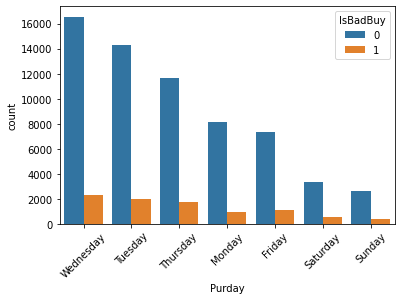

In [21]:
plt.figure()
sns.countplot(df_train['Purday'], order= df_train['Purday'].value_counts().index, hue=df_train['IsBadBuy'])
plt.xticks(rotation=45)
plt.show()

A lot of purchase happened during mid week (tues- thrus)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


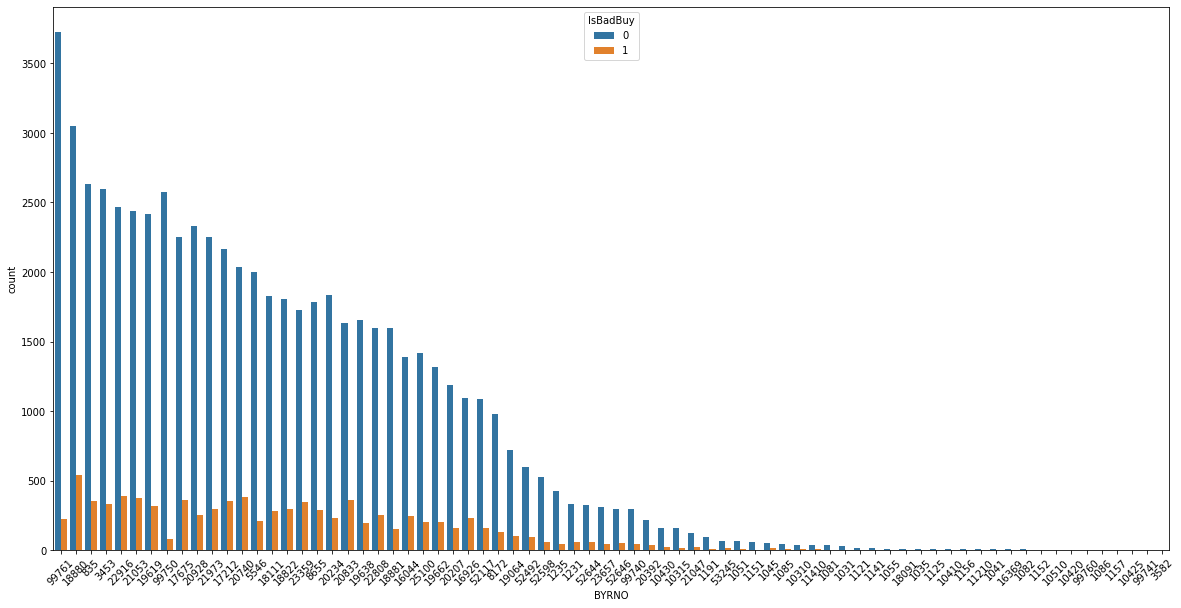

In [22]:
df_train['BYRNO'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(df_train['BYRNO'], order= df_train['BYRNO'].value_counts().index, hue=df_train['IsBadBuy'])
plt.xticks(rotation=45)
plt.show()

<h5>Col rearranging</h5>

In [23]:
catcol = list(set(catcol).union({'Purday','PurMonth','BYRNO'}) - {'PurchDate'})
print(catcol)

['IsOnlineSale', 'Model', 'Purday', 'AUCGUART', 'Transmission', 'Size', 'PurMonth', 'SubModel', 'Color', 'Trim', 'Nationality', 'VNST', 'VNZIP1', 'Make', 'Auction', 'TopThreeAmericanName', 'BYRNO', 'WheelType', 'PRIMEUNIT']


In [24]:
numcol = list(set(numcol)-{'BYRNO','RefId'})
print(numcol)

['MMRAcquisitionAuctionCleanPrice', 'WheelTypeID', 'VehicleAge', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 'VehYear', 'VehBCost', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'VehOdo', 'MMRAcquisitionRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'WarrantyCost']


In [25]:
catcol = list(set(catcol)-{'PRIMEUNIT','AUCGUART'})
print(catcol)

['IsOnlineSale', 'Model', 'Purday', 'Transmission', 'Size', 'PurMonth', 'SubModel', 'Trim', 'Color', 'Nationality', 'VNST', 'VNZIP1', 'Make', 'Auction', 'TopThreeAmericanName', 'BYRNO', 'WheelType']


In [26]:
numcol.remove('WheelTypeID')

removing 'WheelTypeId' as it is same as the 'WheelType' in catcol 

In [27]:
print("Numerical Columns :"+str( numcol) +"\n"+"Categorical Colums:"+ str(catcol))

Numerical Columns :['MMRAcquisitionAuctionCleanPrice', 'VehicleAge', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 'VehYear', 'VehBCost', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'VehOdo', 'MMRAcquisitionRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'WarrantyCost']
Categorical Colums:['IsOnlineSale', 'Model', 'Purday', 'Transmission', 'Size', 'PurMonth', 'SubModel', 'Trim', 'Color', 'Nationality', 'VNST', 'VNZIP1', 'Make', 'Auction', 'TopThreeAmericanName', 'BYRNO', 'WheelType']


<h4>Missing Data Handling</h4>

In [28]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent',copy=True)
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median',copy=True)

In [29]:
df_train[catcol] = imputer1.fit_transform(df_train[catcol])
df_test[catcol] = imputer1.transform(df_test[catcol]) 

In [30]:
print(df_train[catcol].isnull().sum())
print(df_test[catcol].isnull().sum())

IsOnlineSale            0
Model                   0
Purday                  0
Transmission            0
Size                    0
PurMonth                0
SubModel                0
Trim                    0
Color                   0
Nationality             0
VNST                    0
VNZIP1                  0
Make                    0
Auction                 0
TopThreeAmericanName    0
BYRNO                   0
WheelType               0
dtype: int64
IsOnlineSale            0
Model                   0
Purday                  0
Transmission            0
Size                    0
PurMonth                0
SubModel                0
Trim                    0
Color                   0
Nationality             0
VNST                    0
VNZIP1                  0
Make                    0
Auction                 0
TopThreeAmericanName    0
BYRNO                   0
WheelType               0
dtype: int64


In [31]:
df_train[numcol]=imputer2.fit_transform(df_train[numcol])
df_test[numcol]=imputer2.transform(df_test[numcol])
print(df_train[numcol].isnull().sum())
print(df_test[numcol].isnull().sum())

MMRAcquisitionAuctionCleanPrice      0
VehicleAge                           0
MMRAcquisitionAuctionAveragePrice    0
MMRCurrentRetailAveragePrice         0
VehYear                              0
VehBCost                             0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionCleanPrice          0
VehOdo                               0
MMRAcquisitionRetailAveragePrice     0
MMRCurrentRetailCleanPrice           0
MMRCurrentAuctionAveragePrice        0
WarrantyCost                         0
dtype: int64
MMRAcquisitionAuctionCleanPrice      0
VehicleAge                           0
MMRAcquisitionAuctionAveragePrice    0
MMRCurrentRetailAveragePrice         0
VehYear                              0
VehBCost                             0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionCleanPrice          0
VehOdo                               0
MMRAcquisitionRetailAveragePrice     0
MMRCurrentRetailCleanPrice           0
MMRCurrentAuctionAveragePrice        0
WarrantyCost

<h5>Normalising numerical features</h5>

In [32]:
for e in numcol:
  print(e,df_train[e].skew())

MMRAcquisitionAuctionCleanPrice 0.4665774823341268
VehicleAge 0.3936160140515686
MMRAcquisitionAuctionAveragePrice 0.46370730707672575
MMRCurrentRetailAveragePrice 0.20198794824082147
VehYear -0.3373612280111606
VehBCost 0.715931344553674
MMRAcquisitonRetailCleanPrice 0.17633501204104482
MMRCurrentAuctionCleanPrice 0.5370562874687849
VehOdo -0.45314542975653155
MMRAcquisitionRetailAveragePrice 0.20925243994883172
MMRCurrentRetailCleanPrice 0.19536762577821853
MMRCurrentAuctionAveragePrice 0.5240852108297268
WarrantyCost 2.0708311689944803


lot of skewed data is present which could effect models as basic assumption for machine learning models is features following gaussian distribution

In [33]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_train[numcol]=pt.fit_transform(df_train[numcol])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


<h6>Comment</h6>

box cox but it strictly supports positves values , but yeo-johnson method supports both positive and negative values (default in case of powertransformer)

In [34]:
df_test[numcol]=pt.transform(df_test[numcol])

<h5> Distribution after making data more Gaussian-like</h5>

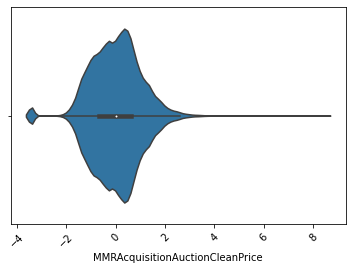

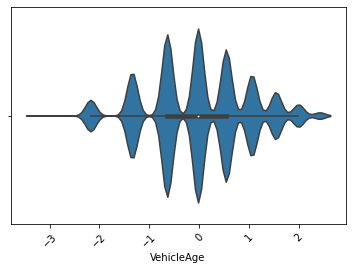

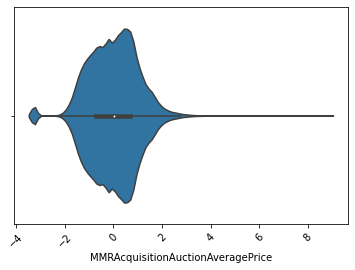

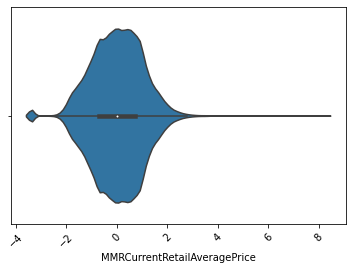

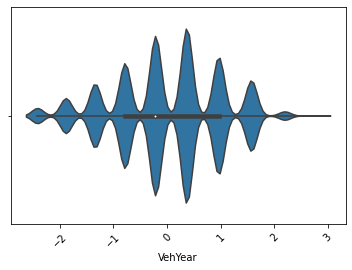

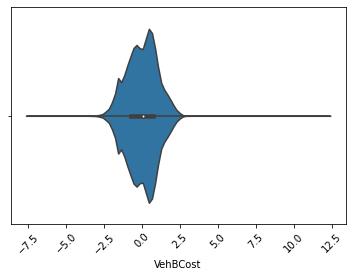

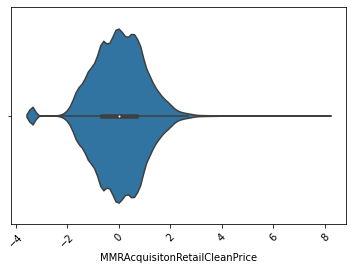

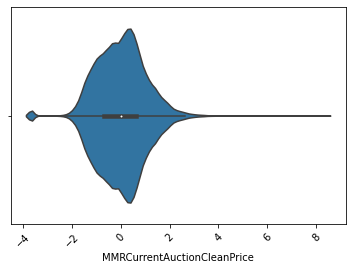

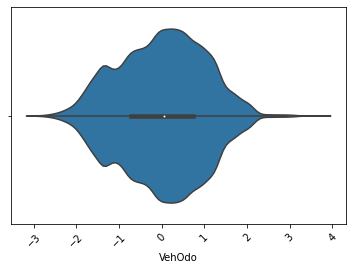

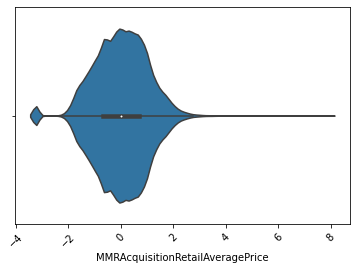

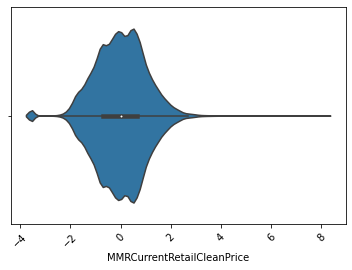

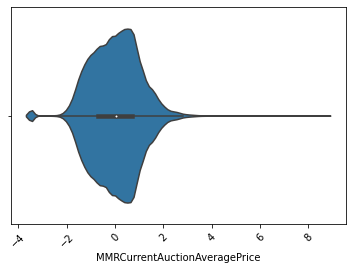

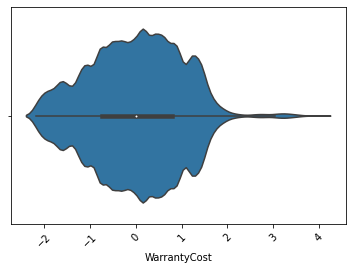

In [35]:
for e in numcol:
  plt.figure()
  sns.violinplot(data=df_train,x=e)
  plt.xticks(rotation=45)
  plt.show()

<h5>Removing Outliers using IQR Method</h5>

In [36]:
def outliers(df,feat):
  q1=df[feat].quantile(0.25)
  q3=df[feat].quantile(0.75)
  iqr = q3-q1

  low_bound = q1 - 1.5*iqr
  upp_bound = q3 + 1.5*iqr

  ls = df.index[(df[feat]<low_bound) | (df[feat]>upp_bound)]

  return ls

In [37]:
df_trCop = df_train.copy()
index_list =[]
for e in numcol:
  index_list.extend(outliers(df_trCop,e))

In [38]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df 

In [39]:
len(index_list)

9058

Data after removing outliers

In [40]:
df_trainc =  remove(df_trCop,index_list)
df_trainc.shape

(70356, 36)

In [41]:
X_train = df_trainc[list(set(numcol).union(set(catcol)))]
X_test = df_test[list(set(numcol).union(set(catcol)))]
y_train = df_trainc['IsBadBuy']

In [42]:
print(X_train.shape, X_test.shape, y_train.shape)

(70356, 30) (48707, 30) (70356,)


<h5>Correlation for numerical features</h5>

In [43]:
corr =df_trainc[list(set(numcol).union({'IsBadBuy'}))].corr()

corr.style.background_gradient(cmap='coolwarm')

,MMRAcquisitionAuctionCleanPrice,VehBCost,VehicleAge,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,VehOdo,MMRAcquisitionAuctionAveragePrice,IsBadBuy,MMRAcquisitionRetailAveragePrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentAuctionAveragePrice,VehYear,WarrantyCost
MMRAcquisitionAuctionCleanPrice,1.000000,0.824294,-0.543421,0.901344,0.946618,0.015507,0.989305,-0.115297,0.884506,0.866031,0.877230,0.938090,0.567073,0.047112
VehBCost,0.824294,1.000000,-0.311305,0.785204,0.796716,-0.077419,0.826679,-0.109961,0.779977,0.772644,0.776943,0.796564,0.354810,0.029002
VehicleAge,-0.543421,-0.311305,1.000000,-0.438995,-0.548605,0.335794,-0.598175,0.156344,-0.478592,-0.516191,-0.476966,-0.598581,-0.950673,0.243891
MMRAcquisitonRetailCleanPrice,0.901344,0.785204,-0.438995,1.000000,0.858269,0.062768,0.893755,-0.092114,0.989279,0.920432,0.923702,0.849900,0.575770,0.023539
MMRCurrentAuctionCleanPrice,0.946618,0.796716,-0.548605,0.858269,1.000000,0.001144,0.944500,-0.114834,0.848950,0.893105,0.907418,0.989701,0.569224,0.042596
VehOdo,0.015507,-0.077419,0.335794,0.062768,0.001144,1.000000,-0.029769,0.083816,0.027750,0.012047,0.045895,-0.041270,-0.286254,0.452755
MMRAcquisitionAuctionAveragePrice,0.989305,0.826679,-0.598175,0.893755,0.944500,-0.029769,1.000000,-0.122163,0.894293,0.875852,0.874851,0.950958,0.619007,0.007907
IsBadBuy,-0.115297,-0.109961,0.156344,-0.092114,-0.114834,0.083816,-0.122163,1.000000,-0.095632,-0.112311,-0.108964,-0.120270,-0.150564,0.041476
MMRAcquisitionRetailAveragePrice,0.884506,0.779977,-0.478592,0.989279,0.848950,0.027750,0.894293,-0.095632,1.000000,0.928244,0.920093,0.852517,0.619004,-0.010683
MMRCurrentRetailAveragePrice,0.866031,0.772644,-0.516191,0.920432,0.893105,0.012047,0.875852,-0.112311,0.928244,1.000000,0.988969,0.900992,0.619801,-0.006723


<h6>Observations:</h6>

* 8 MMR prices are co related they might cause multicollinearilty problem
* NO Feature is correlated with target variable


As prices are correlated and can create collinearity problem, adding the correlated price to create a new feature 'MMRPrice'

In [44]:
df_trainc['MMRPrice'] = df_trainc['MMRAcquisitionAuctionAveragePrice']+df_trainc['MMRCurrentAuctionAveragePrice']+df_trainc['MMRAcquisitionAuctionCleanPrice']+df_trainc['MMRAcquisitionRetailAveragePrice']+df_trainc['MMRCurrentRetailCleanPrice']+df_trainc['MMRCurrentAuctionCleanPrice']+df_trainc['MMRAcquisitonRetailCleanPrice']+df_trainc['MMRCurrentRetailAveragePrice']
df_test['MMRPrice'] = df_test['MMRAcquisitionAuctionAveragePrice']+df_test['MMRCurrentAuctionAveragePrice']+df_test['MMRAcquisitionAuctionCleanPrice']+df_test['MMRAcquisitionRetailAveragePrice']+df_test['MMRCurrentRetailCleanPrice']+df_test['MMRCurrentAuctionCleanPrice']+df_test['MMRAcquisitonRetailCleanPrice']+df_test['MMRCurrentRetailAveragePrice']

In [45]:
numcol = list (set(numcol).union({'MMRPrice'})-{'MMRCurrentRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'MMRAcquisitionRetailAveragePrice','MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
 'MMRCurrentAuctionAveragePrice'})
print(numcol)

['VehBCost', 'VehicleAge', 'MMRPrice', 'VehOdo', 'VehYear', 'WarrantyCost']


Correlation after feat engineering new feature from existing feature

In [46]:
corr =df_trainc[list(set(numcol).union({'IsBadBuy'}))].corr()
corr.style.background_gradient(cmap='coolwarm')

,IsBadBuy,VehBCost,VehicleAge,MMRPrice,VehYear,WarrantyCost,VehOdo
IsBadBuy,1.000000,-0.109961,0.156344,-0.114752,-0.150564,0.041476,0.083816
VehBCost,-0.109961,1.000000,-0.311305,0.827549,0.354810,0.029002,-0.077419
VehicleAge,0.156344,-0.311305,1.000000,-0.546535,-0.950673,0.243891,0.335794
MMRPrice,-0.114752,0.827549,-0.546535,1.000000,0.620192,0.017384,0.012257
VehYear,-0.150564,0.354810,-0.950673,0.620192,1.000000,-0.261934,-0.286254
WarrantyCost,0.041476,0.029002,0.243891,0.017384,-0.261934,1.000000,0.452755
VehOdo,0.083816,-0.077419,0.335794,0.012257,-0.286254,0.452755,1.000000


In [47]:
from imblearn.over_sampling import SMOTE 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data set before preprocessing

In [48]:
X_train = df_trainc[list(set(numcol).union(set(catcol)))]
X_test = df_test[list(set(numcol).union(set(catcol)))]
y_train = df_trainc['IsBadBuy']
print(X_train.shape, X_test.shape, y_train.shape)

(70356, 23) (48707, 23) (70356,)


In [49]:
X_test.iloc[4]

VehicleAge                 -1.34417
IsOnlineSale                      0
Model                        ACCENT
Purday                     Thursday
Size                        COMPACT
Transmission                   AUTO
VehYear                    0.961206
PurMonth                          2
SubModel                2D COUPE GS
VehBCost                   -1.60332
Trim                             GS
Color                          BLUE
MMRPrice                   -4.71155
Nationality             OTHER ASIAN
VNST                             GA
VNZIP1                        30212
VehOdo                    0.0597932
Make                        HYUNDAI
Auction                       ADESA
TopThreeAmericanName          OTHER
BYRNO                         18111
WarrantyCost              -0.525408
WheelType                     Alloy
Name: 4, dtype: object

<h4>Preprocessing</h4>

*  As Data contains only categorical and numerical features
*  Creating Transformer for specific columns kinds 
* final data is ndarray

In [50]:
preprocessor = ColumnTransformer(
    [
     ('onehot',OneHotEncoder(handle_unknown='ignore'),catcol),
     ('scaler',StandardScaler(), numcol)
    ],
)

In [51]:
X_train = preprocessor.fit_transform(X_train)

In [52]:
X_test = preprocessor.transform(X_test)

In [53]:
print(X_train.shape)
print(X_test.shape)

(70356, 2279)
(48707, 2279)


<h5>Balancing the data</h5>

using SMOTE to oversample the data to not loss information

In [54]:
sm =SMOTE()
X_train , y_train = sm.fit_resample(X_train,y_train)

In [55]:
print(X_train.shape,y_train.shape)

(123806, 2279) (123806,)


In [56]:
y_train.value_counts()

1    61903
0    61903
Name: IsBadBuy, dtype: int64

<h4>Feature Reduction</h4>

* using truncated svd to reduce the dimensions without lossing gainful information
* curtailed features to 200 only due to runtime limitations of the machine

In [57]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
X_train = svd.fit_transform(X_train)
X_test = svd.transform(X_test)
print(X_train.shape,X_test.shape)

(123806, 200) (48707, 200)


scaling before model fitting

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape,X_test.shape)

(123806, 200) (48707, 200)


spliting the data for validating the models

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X_train, y_train, test_size=0.33, random_state=42)

<h4>Model Building</h4>

naive bayes model

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [61]:
y_pred = gnb.predict(X_train)


In [62]:
from sklearn.metrics import precision_score ,recall_score , confusion_matrix , f1_score, accuracy_score

In [63]:
def met(y_pred,y_true):
    print("accuracy:"+ str(accuracy_score(y_pred,y_true)))
    print("Precesion:"+ str(precision_score(y_pred,y_true)))
    print("Recall:"+ str(recall_score(y_pred,y_true)))
    print("F1 Score:"+str(f1_score(y_pred,y_true)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_pred,y_true))
    return

In [64]:
met(y_pred,y_train)
y_pred = gnb.predict(X_cv)
met(y_pred,y_cv)

accuracy:0.6508137432188065
Precesion:0.7022906279355444
Recall:0.6371443555788645
F1 Score:0.6681332279242429
Confusion Matrix:
[[24828 12360]
 [16605 29157]]
accuracy:0.6505042099079694
Precesion:0.6977827921122339
Recall:0.6366647272076266
F1 Score:0.6658241475344615
Confusion Matrix:
[[12352  6161]
 [ 8118 14225]]


<h5>Logistic model</h5>

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_train)
met(y_pred,y_train)
y_pred = clf.predict(X_cv)
met(y_pred,y_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy:0.660699216395419
Precesion:0.6808054531878508
Recall:0.6549191343435747
F1 Score:0.667611455565397
Confusion Matrix:
[[26540 13252]
 [14893 28265]]
accuracy:0.6577491678088898
Precesion:0.6790934955361523
Recall:0.6504110876203899
F1 Score:0.6644428979386143
Confusion Matrix:
[[13029  6542]
 [ 7441 13844]]


<h5>Random Forest model</h5>

In [66]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred = RF.predict(X_train)
met(y_pred,y_train)

accuracy:1.0
Precesion:1.0
Recall:1.0
F1 Score:1.0
Confusion Matrix:
[[41433     0]
 [    0 41517]]


best model so far and cross validation metrics are also good 

In [67]:
print("Cross validation:")
y_pred = RF.predict(X_cv)
met(y_pred,y_cv)
yt_pred = RF.predict(X_test)

Cross validation:
accuracy:0.9384423340513022
Precesion:0.9426076719317178
Recall:0.9345848937308496
F1 Score:0.9385791388868536
Confusion Matrix:
[[19125  1170]
 [ 1345 19216]]


GridSearch for hyperparameter tuning 

* it gave best results with default values

In [68]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression(max_iter=1000)
parameters = {'penalty':('l2','none'),'C':[0.1,1,10]}
clf = GridSearchCV(LR,parameters,n_jobs=-1,error_score='raise')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'C': 10, 'penalty': 'l2'}


In [69]:
clf.best_score_

0.6588306208559374

Default is best parameters

<h5>Deep Learning Model</h5>


In [70]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf

In [71]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [72]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17043193672465846190
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4535090454137515422
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [73]:
model = Sequential()

model.add(Flatten(input_shape=(200,)))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu', kernel_regularizer=keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

Architecture :

* 3 hidden layer neural network
* 3 drop out layers
* softmax output layer which outputs probabilties of class
* Adam optimizer as momentum for sgd

In [74]:
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [75]:
hist = model.fit(X_train, y_train,
                 validation_data = (X_cv,y_cv),
                 epochs = 100,
                 batch_size = 32)

Epoch 1/100
2593/2593 [==============================] - 17s 6ms/step - loss: 1.1743 - accuracy: 0.5511 - val_loss: 0.8490 - val_accuracy: 0.6416
Epoch 2/100
2593/2593 [==============================] - 15s 6ms/step - loss: 0.7840 - accuracy: 0.6291 - val_loss: 0.7453 - val_accuracy: 0.6225
Epoch 3/100
2593/2593 [==============================] - 13s 5ms/step - loss: 0.7185 - accuracy: 0.6455 - val_loss: 0.6985 - val_accuracy: 0.6509
Epoch 4/100
2593/2593 [==============================] - 15s 6ms/step - loss: 0.6954 - accuracy: 0.6493 - val_loss: 0.6784 - val_accuracy: 0.6664
Epoch 5/100
2593/2593 [==============================] - 13s 5ms/step - loss: 0.6842 - accuracy: 0.6541 - val_loss: 0.6725 - val_accuracy: 0.6605
Epoch 6/100
2593/2593 [==============================] - 15s 6ms/step - loss: 0.6751 - accuracy: 0.6588 - val_loss: 0.6627 - val_accuracy: 0.6731
Epoch 7/100
2593/2593 [==============================] - 15s 6ms/step - loss: 0.6692 - accuracy: 0.6624 - val_loss: 0.6636 -

In [76]:
test_error, test_accuracy = model.evaluate(X_cv, y_cv, verbose=1)
print(f"Test accuracy: {test_accuracy}")

1277/1277 [==============================] - 4s 3ms/step - loss: 0.4382 - accuracy: 0.8390
Test accuracy: 0.8389710187911987


<Figure size 3600x3240 with 0 Axes>

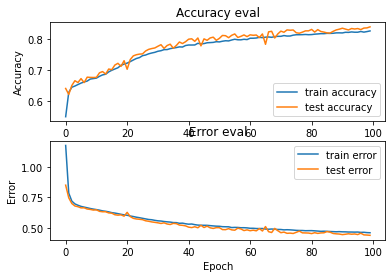

In [77]:
plt.figure(figsize=(50,45))
fig, axs = plt.subplots(2)

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train accuracy")
axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")
    
print("\n")
# Error 
axs[1].plot(hist.history["loss"], label="train error")
axs[1].plot(hist.history["val_loss"], label="test error")    
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")
    
plt.show()

In [78]:
ytnn_pred = model.predict(X_test)

In [87]:
ynncv = model.predict(X_cv)

In [88]:
ynncvpred = np.argmax(ynncv, axis=-1)
met(ynncvpred,y_cv)

accuracy:0.8389710201683963
Precesion:0.8282154419699794
Recall:0.8458494063423676
F1 Score:0.8369395494088779
Confusion Matrix:
[[17393  3502]
 [ 3077 16884]]


Random Forest target variable 

In [79]:
yt_pred.dtype
df_test['IsBadBuyRF'] = yt_pred

class output for neural network prediction

In [80]:
ynn = np.argmax(ytnn_pred, axis=-1) #neural network class predict as predict_classes() support was stopped

predict classes value counts

In [81]:
def nuvalcount(y):
  y_un, y_uncount = np.unique(y, return_counts=True)
  print(y_un,y_uncount)
  return

In [82]:
nuvalcount(yt_pred)
nuvalcount(ynn)

[0 1] [44864  3843]
[0 1] [39543  9164]


In [83]:
df_test['IsBadBuyNN'] = ynn

In [84]:
df_test.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurMonth,Purday,MMRPrice,IsBadBuyRF,IsBadBuyNN
0,73015,12/2/2009,ADESA,-0.218330,-0.019694,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,0.975309,AMERICAN,LARGE,GM,-0.388293,-0.314687,-0.781431,-0.697760,-0.449524,-0.403791,-0.035237,-0.090764,NaN,NaN,18881,30212,GA,-0.065254,0,1.409577,2,Thursday,-3.161487,0,0
1,73016,12/2/2009,ADESA,-0.218330,-0.019694,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,-0.727447,AMERICAN,MEDIUM,GM,-0.613448,-0.579668,-0.974190,-0.929947,-0.562925,-0.587671,-0.358104,-0.228510,NaN,NaN,18111,30212,GA,-0.181093,0,-0.070380,2,Thursday,-4.834464,0,0
2,73017,12/2/2009,ADESA,0.364699,-0.640443,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,-0.234167,AMERICAN,MEDIUM SUV,CHRYSLER,1.576783,1.947951,0.962649,1.360195,1.815235,1.687835,2.019488,1.856615,NaN,NaN,18111,30212,GA,1.589674,0,0.121796,2,Thursday,13.226751,0,0
3,73018,12/2/2009,ADESA,-1.889508,1.540558,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,1.180645,AMERICAN,MEDIUM,GM,-1.512140,-1.444631,-1.720635,-1.669740,-1.368389,-1.467034,-0.975848,-1.131317,NaN,NaN,18881,30212,GA,-1.567220,0,1.172089,2,Thursday,-11.289733,0,0
4,73019,12/2/2009,ADESA,0.961206,-1.344173,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,Alloy,0.059793,OTHER ASIAN,COMPACT,OTHER,-0.396252,-0.330737,-0.788429,-0.712060,-0.402951,-0.341429,-0.910786,-0.828903,NaN,NaN,18111,30212,GA,-1.603320,0,-0.525408,2,Thursday,-4.711548,0,0


In [85]:
df_test = pd.read_csv("/content/drive/My Drive/data/badbuyprediction/test.csv")
df_test['IsBadBuyRF'] = yt_pred
df_test['IsBadBuyNN'] = ynn

Created a file testsub.csv which has output classes for rf and NN models

In [86]:
df_test.to_csv("/content/drive/My Drive/data/badbuyprediction/testsub.csv")

<h2>Conclusion</h2>

metrics validation scores

| Model | Accuracy | Precesion | Recall | F1_score |
| --- | --- | --- | --- | --- |
| Naive bayes |0.6505042099079694 |0.6977827921122339 |0.6366647272076266 |0.6658241475344615 |
| Logistic Regression | 0.6577491678088898|0.6790934955361523 |0.6504110876203899 |0.6644428979386143 |
| Random Forest |0.9384423340513022 |0.9426076719317178 |0.9345848937308496 |0.9385791388868536 |
|3 layered NN|0.8389710201683963 |0.8282154419699794 |0.8458494063423676 | 0.8369395494088779 |
